In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is ACC0-1167

 Directory of C:\Users\shand\Documents\Siddy\ExcelR\Assignment\Logistic Regression

11-01-2022  02:11    <DIR>          .
10-01-2022  23:09    <DIR>          ..
11-01-2022  01:43    <DIR>          .ipynb_checkpoints
10-01-2022  23:24         3,751,306 bank-full.csv
08-01-2022  21:48             1,776 Data+Science+Assignments_8582301586255978.txt
11-01-2022  02:11            60,950 Logistic Regression.ipynb
08-01-2022  21:47               108 Problem-Statement(Bank_data).txt
               4 File(s)      3,814,140 bytes
               3 Dir(s)  208,967,135,232 bytes free


In [3]:
bank = pd.read_csv("bank-full.csv")

In [4]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
bank.shape

(45211, 17)

In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [9]:
Job = {"blue-collar":1,"management":2,"technician":3,"admin.":4,"services":5,"retired":6,"self-employed":7,"entrepreneur":8,"unemployed":9,"housemaid":10,"student":11,"unknown":12}

In [10]:
bank.job = [Job[ item ] for item in bank.job]

In [11]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,3,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,8,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,12,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bank.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [13]:
Marital = {"married":1, "single":0, "divorced":2}

In [14]:
bank.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [15]:
Education = {"unknown":0, "primary":1, "secondary":2, "tertiary":3}

In [16]:
bank.marital = [Marital[ item ] for item in bank.marital]

In [17]:
bank.education = [Education[item] for item in bank.education]

In [18]:
Bin = {"yes": 1, "no":0}


In [19]:
bank.housing = [Bin[item] for item in bank.housing]
bank.loan = [Bin[item] for item in bank.loan]
bank.default = [Bin[item] for item in bank.default]
bank.y = [Bin[item] for item in bank.y]

In [20]:
bank.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [21]:
Month = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

In [22]:
bank.month = [Month[i] for i in bank.month]

In [23]:
bank.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [24]:
Poutcome = {"failure":0,"success":1,"unknown":2,"other":3}

In [25]:
bank.poutcome = [Poutcome[item] for item in bank.poutcome]

In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  int64 
 2   marital    45211 non-null  int64 
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  int64 
 16  y          45211 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 5.9+ MB


In [27]:
bank.drop(["day","contact",], inplace = True, axis = 1)

In [28]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,y
0,58,2,1,3,0,2143,1,0,5,261,1,-1,0,2,0
1,44,3,0,2,0,29,1,0,5,151,1,-1,0,2,0
2,33,8,1,2,0,2,1,1,5,76,1,-1,0,2,0
3,47,1,1,0,0,1506,1,0,5,92,1,-1,0,2,0
4,33,12,0,0,0,1,0,0,5,198,1,-1,0,2,0


In [29]:
bank.shape

(45211, 15)

In [63]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [66]:
array = bank.values
scaler = MinMaxScaler()
rescaledx = scaler.fit_transform(array[:,:14])

In [68]:
set_printoptions(precision = 2)
print(rescaledx[0:5,:])

[[0.52 0.09 0.5  1.   0.   0.09 1.   0.   0.36 0.05 0.   0.   0.   0.67]
 [0.34 0.18 0.   0.67 0.   0.07 1.   0.   0.36 0.03 0.   0.   0.   0.67]
 [0.19 0.64 0.5  0.67 0.   0.07 1.   1.   0.36 0.02 0.   0.   0.   0.67]
 [0.38 0.   0.5  0.   0.   0.09 1.   0.   0.36 0.02 0.   0.   0.   0.67]
 [0.19 1.   0.   0.   0.   0.07 0.   0.   0.36 0.04 0.   0.   0.   0.67]]


In [69]:
bank1 = pd.DataFrame(rescaledx)

In [70]:
bank1.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.519481,0.090909,0.5,1.000000,0.0,0.092259,1.0,0.0,0.363636,0.053070,0.0,0.0,0.0,0.666667
1,0.337662,0.181818,0.0,0.666667,0.0,0.073067,1.0,0.0,0.363636,0.030704,0.0,0.0,0.0,0.666667
2,0.194805,0.636364,0.5,0.666667,0.0,0.072822,1.0,1.0,0.363636,0.015453,0.0,0.0,0.0,0.666667
3,0.376623,0.000000,0.5,0.000000,0.0,0.086476,1.0,0.0,0.363636,0.018707,0.0,0.0,0.0,0.666667
4,0.194805,1.000000,0.0,0.000000,0.0,0.072812,0.0,0.0,0.363636,0.040260,0.0,0.0,0.0,0.666667
5,0.220779,0.090909,0.5,1.000000,0.0,0.074901,1.0,0.0,0.363636,0.028264,0.0,0.0,0.0,0.666667
6,0.129870,0.090909,0.0,1.000000,0.0,0.076862,1.0,1.0,0.363636,0.044124,0.0,0.0,0.0,0.666667
7,0.311688,0.636364,1.0,1.000000,1.0,0.072822,1.0,0.0,0.363636,0.077267,0.0,0.0,0.0,0.666667
8,0.519481,0.454545,0.5,0.333333,0.0,0.073902,1.0,0.0,0.363636,0.010167,0.0,0.0,0.0,0.666667
9,0.324675,0.181818,0.0,0.666667,0.0,0.078187,1.0,0.0,0.363636,0.011183,0.0,0.0,0.0,0.666667


In [71]:
x = bank1.iloc[:,:14]
y = bank.iloc[:,14]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size = 0.3, shuffle = True)

In [74]:
x_train.shape

(31647, 14)

In [75]:
y_train.shape

(31647,)

In [76]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [77]:
classifier.intercept_

array([-3.04])

In [78]:
classifier.coef_

array([[ 0.44,  0.49, -0.46,  0.65, -0.4 ,  1.53, -1.04, -0.63,  0.09,
        16.88, -5.55,  2.45,  3.15, -0.47]])

In [79]:
y_train_pred = classifier.predict(x_train)

In [80]:
ac(y_train,y_train_pred)

0.8892154074635826

In [81]:
y_test_pred = classifier.predict(x_test)

In [82]:
ac(y_test,y_test_pred)

0.8927307578885284

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [84]:
confusion_matrix = confusion_matrix(y_test,y_test_pred)
print(confusion_matrix)

[[11822   177]
 [ 1278   287]]


In [85]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (x_test)[:,1])
auc = roc_auc_score(y_test, y_test_pred)

In [86]:
import matplotlib.pyplot as plt

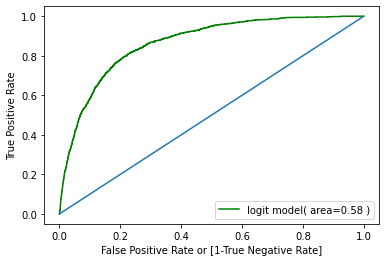

In [87]:
plt.plot(fpr, tpr, color = "green", label = "logit model( area=%0.2f )"%auc)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'best')
plt.show()

In [88]:
auc

0.5843176761002714

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.62      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [105]:
y_pred_df = pd.DataFrame({'Actual':y, 'Predicted Value': classifier.predict(x)})
y_pred_df

,Actual,Predicted Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [106]:
df = {0:"No", 1:"Yes"}
y_pred_df.Actual = [df[i] for i in y_pred_df.Actual]
y_pred_df["Predicted Value"] = [df[i] for i in y_pred_df["Predicted Value"]]
y_pred_df


,Actual,Predicted Value
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
45206,Yes,Yes
45207,Yes,No
45208,Yes,Yes
45209,No,No
